In [3]:
import math
import csv as csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import cross_validation 
from sklearn import svm
from sklearn import ensemble

sns.set()
sns.set(style="whitegrid", color_codes=True)
sns.set_palette(sns.color_palette("Set2", 10))
%matplotlib inline

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [5]:
# VARIABLE DESCRIPTIONS:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)

# SPECIAL NOTES:
# Pclass is a proxy for socio-economic status (SES)
#  1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

# Age is in Years; Fractional if Age less than One (1)
#  If the Age is Estimated, it is in the form xx.5

# With respect to the family relation variables (i.e. sibsp and parch)
# some relations were ignored.  The following are the definitions used
# for sibsp and parch.

# Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
# Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
# Parent:   Mother or Father of Passenger Aboard Titanic
# Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

# Other family relatives excluded from this study include cousins,
# nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
# only with a nanny, therefore parch=0 for them.  As well, some
# travelled with very close friends or neighbors in a village, however,
# the definitions do not support such relations.

In [6]:
# load data
df_orig = pd.read_csv("data/train.csv")

In [7]:
df_orig.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [8]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


The variables age, cabin and embarked have null values. We will fill missing values for age with the median. Let's have a look at the variables cabin and embarked.

In [9]:
print df_orig['Cabin'].unique()

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C45'
 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']


The variable cabin does not look very meaningful by itself. Maybe we can still use it to derive some more useful features, e.g.: 
    1. the number of cabins per passenger
    2. The first letter of the cabin number looks like a cabin type: A, B, C, etc.

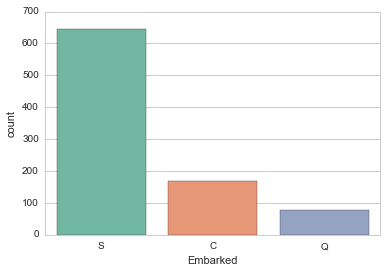

In [10]:
sns.countplot(x="Embarked", data=df_orig)

Fill missing values for Embarked with 'S', the most frequent port of embarkation.

In [11]:
# clean data 
def clean(df_orig):
    
    df = df_orig.copy()
    
    if len(df.columns)==12: # training set (with column 'survived')
        df.columns = ['PassengerId', 'survived', 'class', 'name', 'sex', 'age', 
            'n_sib_spo', 'n_par_chi', 'ticket_no', 'fare', 'cabin_no', 'embarked']
    elif len(df.columns)==11: # test set (without column 'survived')
        df.columns = ['PassengerId', 'class', 'name', 'sex', 'age', 
            'n_sib_spo', 'n_par_chi', 'ticket_no', 'fare', 'cabin_no', 'embarked']
    else:
        print "wrong input data"
        return
    
    # fill missing age values with the median age
    df['age'].fillna(value=df['age'].median(), inplace=True)
    
    # fill missing fare values with the median age
    df['fare'].fillna(value=df['fare'].median(), inplace=True)
    
    # most frequent port of embarkation 
    most_frequent_port_of_embarkation = df['embarked'].value_counts().idxmax()
    df['embarked'].fillna(value=most_frequent_port_of_embarkation, inplace=True)
    df['embarked'] = df['embarked'].map({'C':'Cherbourg', 'Q':'Queenstown','S':'Southampton'})
    
    # use cabin to derive two new features: number of cabin and cabin type
    df['cabin_no'].fillna(value='???', inplace=True) 
    df['n_cabins'] = df['cabin_no'].apply(lambda x: len(str(x).split()))
    df['cabin_type'] = df['cabin_no'].apply(lambda x: x[0])    
        
    # make sex an integer variable
    df['is_male'] = df['sex'].map({'male':1, 'female':0})
    
    # drop some variables 
    df.drop(['name','ticket_no','cabin_no'], axis=1, inplace=True)
    
    return df

df = clean(df_orig)

df.head(n=10)

,PassengerId,survived,class,sex,age,n_sib_spo,n_par_chi,fare,embarked,n_cabins,cabin_type,is_male
0,1,0,3,male,22,1,0,7.2500,Southampton,1,?,1
1,2,1,1,female,38,1,0,71.2833,Cherbourg,1,C,0
2,3,1,3,female,26,0,0,7.9250,Southampton,1,?,0
3,4,1,1,female,35,1,0,53.1000,Southampton,1,C,0
4,5,0,3,male,35,0,0,8.0500,Southampton,1,?,1
5,6,0,3,male,28,0,0,8.4583,Queenstown,1,?,1
6,7,0,1,male,54,0,0,51.8625,Southampton,1,E,1
7,8,0,3,male,2,3,1,21.0750,Southampton,1,?,1
8,9,1,3,female,27,0,2,11.1333,Southampton,1,?,0
9,10,1,2,female,14,1,0,30.0708,Cherbourg,1,?,0


In [14]:
vars_categorical = ['class', 'sex', 'embarked', 'cabin_type', 'is_male']
vars_numerical = ['class', 'age', 'n_sib_spo', 'n_par_chi', 'fare', 'n_cabins', 'is_male']

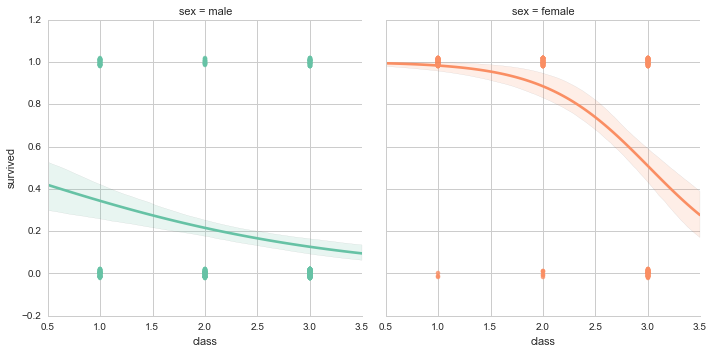

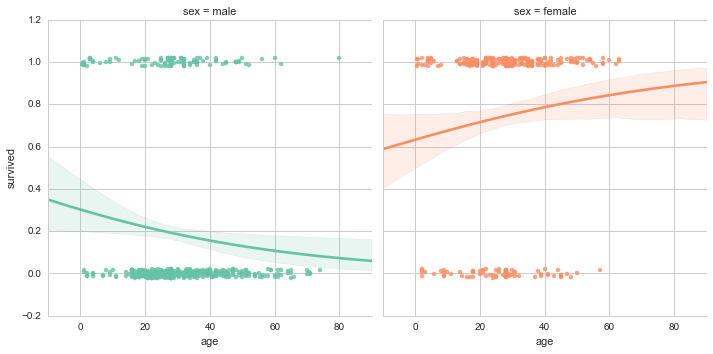

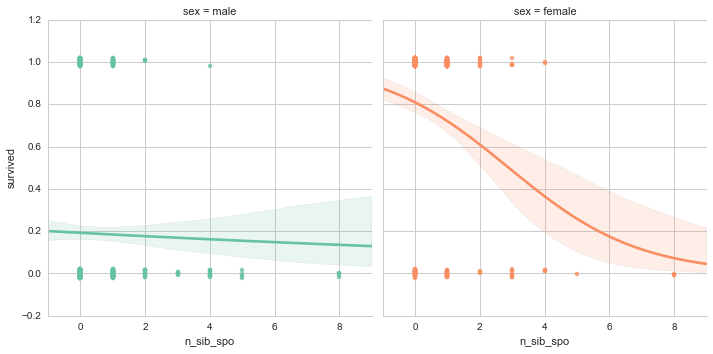

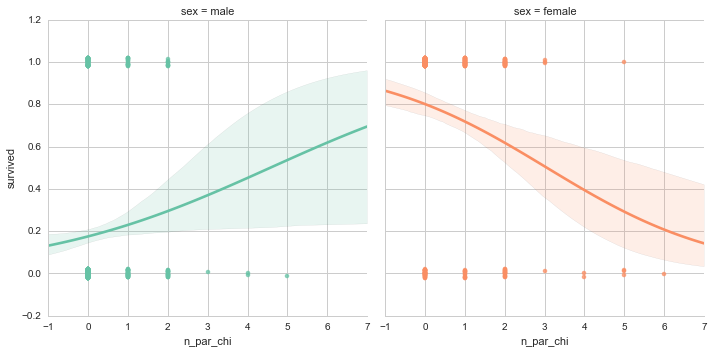

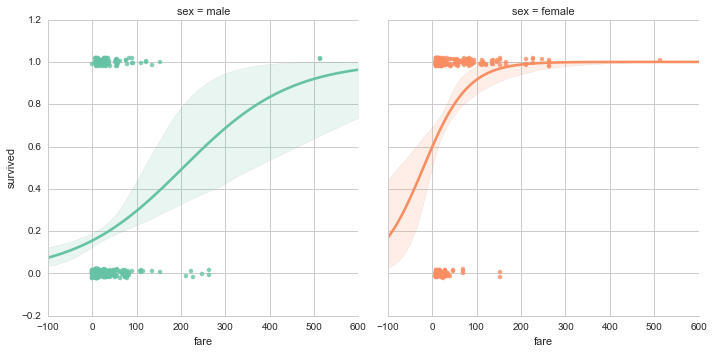

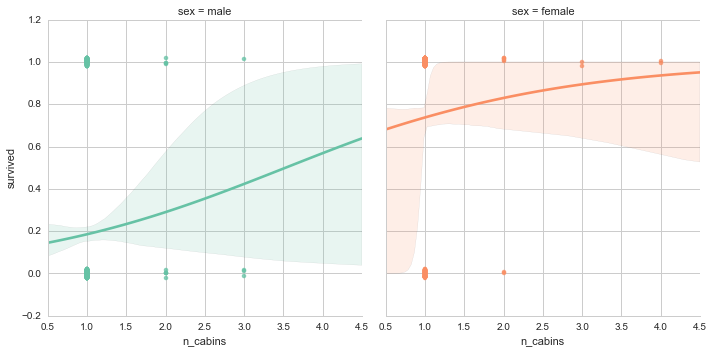

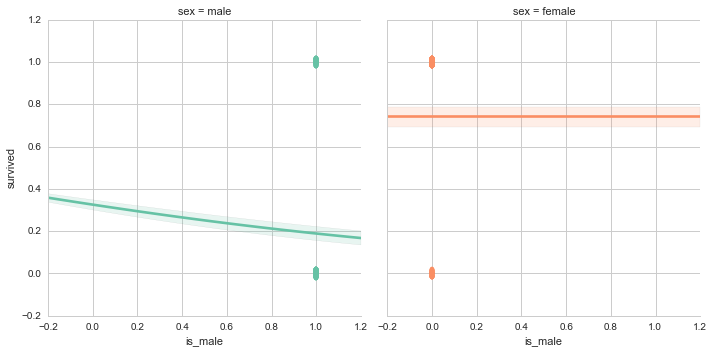

In [151]:
for var in vars_numerical:
    g = sns.lmplot(x=var, y="survived", col="sex", hue="sex", data=df, y_jitter=.02, logistic=True)

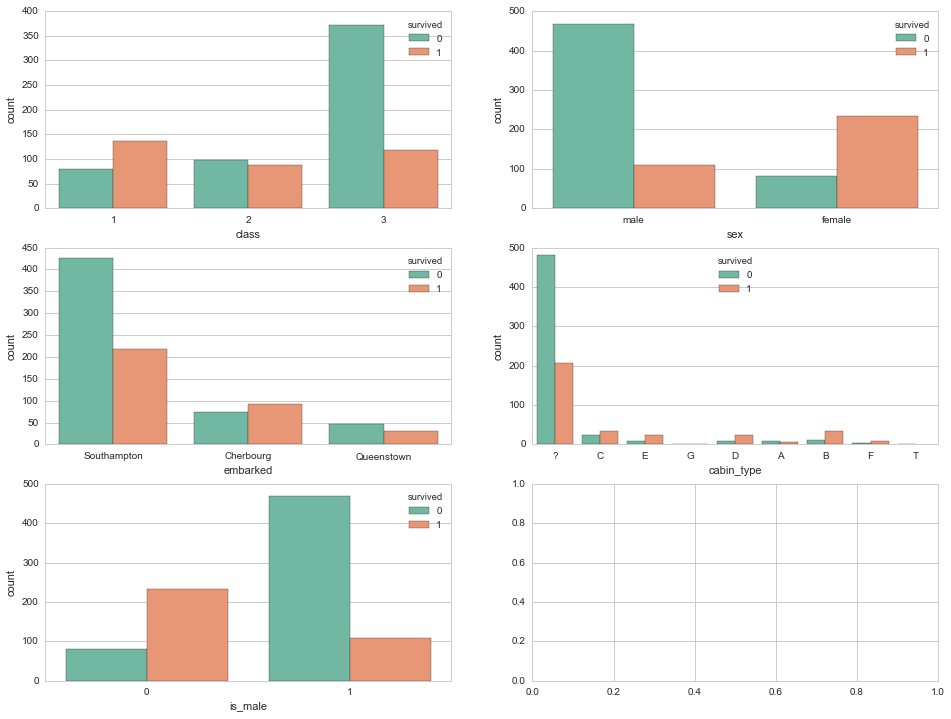

In [148]:
ncols = 2
nrows = int(math.ceil(len(vars_categorical)/2.0))
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(16, 12))
for i,var in enumerate(vars_categorical):
    sns.countplot(x=var, hue="survived", data=df, ax=axs[i/ncols,i%ncols])

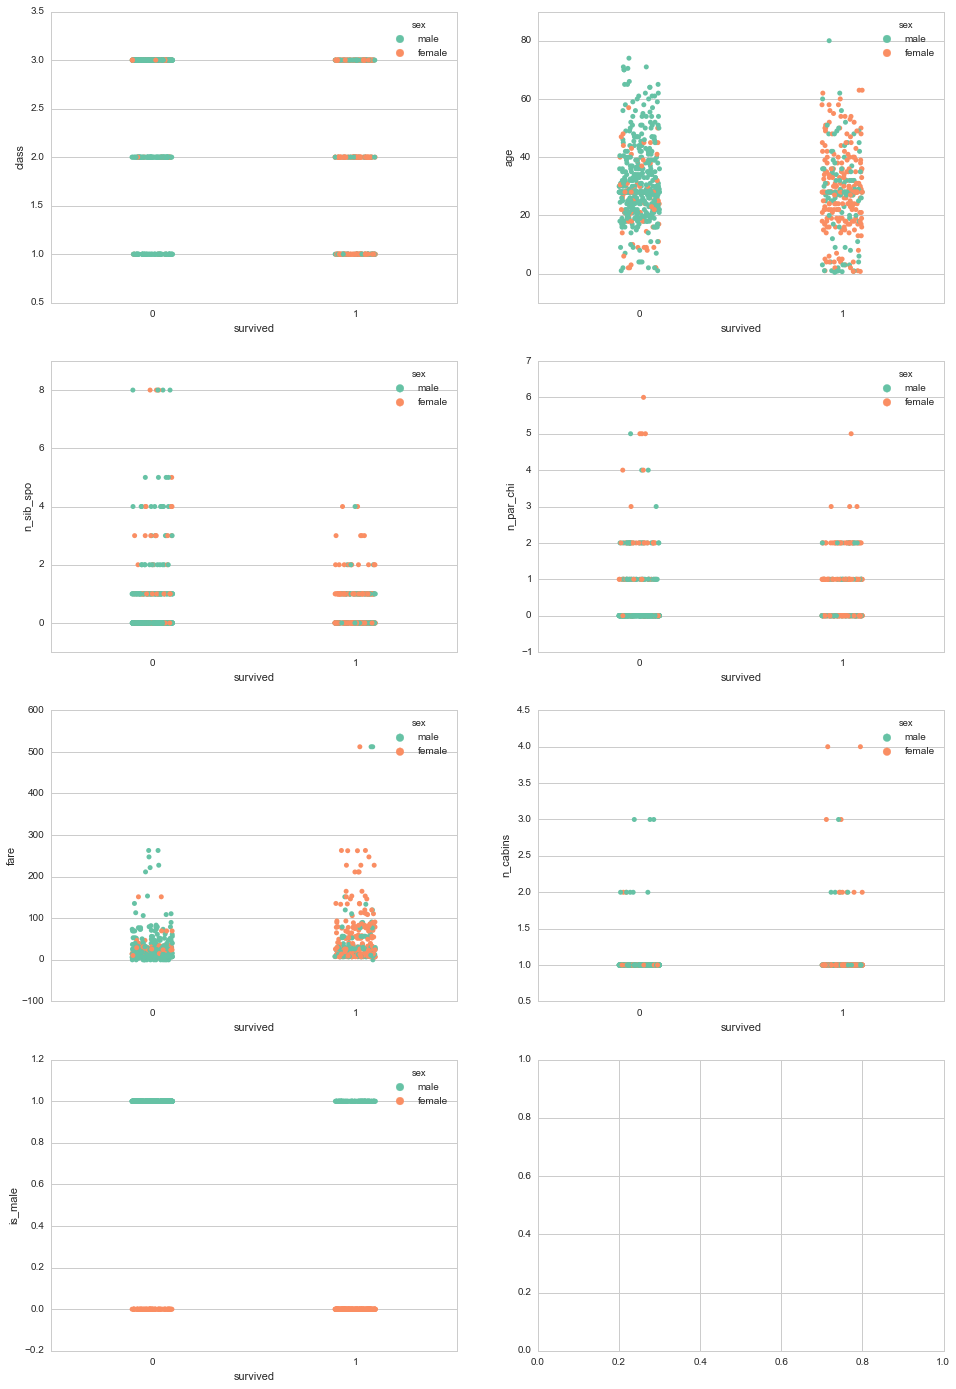

In [152]:
ncols = 2
nrows = int(math.ceil(len(vars_numerical)/2.0))
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(16, 24))
for i,var in enumerate(vars_numerical):
    sns.stripplot(x="survived", y=var, hue="sex", data=df, jitter=True, ax=axs[i/ncols,i%ncols])

Split data into training set and test set.

In [15]:
x = df[vars_numerical]
y = df["survived"]
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2, random_state=0)

Train a SVM.

In [8]:
svm_pol = svm.SVC(kernel='poly', degree=3, C=1.0)
svm_pol.fit(x_train, y_train)
print "Mean accuracy of SVM with polynomial kernel:", svm_pol.score(x_test, y_test)

Mean accuracy of SVM with polynomial kernel: 0.697478991597


In [32]:
svm_rbf = svm.SVC(kernel='rbf', C=1.0)
svm_rbf.fit(x_train, y_train)
print "Mean accuracy of SVM with RBF kernel on train set:", svm_rbf.score(x_train, y_train)
print "Mean accuracy of SVM with RBF kernel on test set: ", svm_rbf.score(x_test, y_test)

Mean accuracy of SVM with RBF kernel on train set: 0.904494382022
Mean accuracy of SVM with RBF kernel on test set:  0.714285714286


In [19]:
svm_lin = svm.SVC(kernel='linear', C=1.0)
svm_lin.fit(x_train, y_train)
print "Mean accuracy of SVM with linear kernel on train set:", svm_lin.score(x_train, y_train)
print "Mean accuracy of SVM with linear kernel on test set: ", svm_lin.score(x_test, y_test)

Mean accuracy of SVM with linear kernel on train set: 0.792134831461
Mean accuracy of SVM with linear kernel on test set:  0.778711484594


In [12]:
svc = svm.SVC(kernel='linear')
Cs = np.logspace(-5, 5, 10)

scores = list()
scores_std = list()
for C in Cs:
    svc.C = C
    these_scores = cross_validation.cross_val_score(svc, x, y, n_jobs=1)
    scores.append(np.mean(these_scores))
    scores_std.append(np.std(these_scores))
    

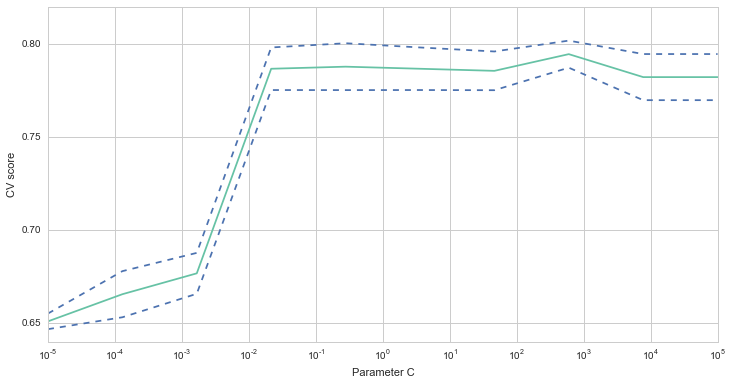

In [17]:
# Do the plotting
plt.figure(1, figsize=(12, 6))
plt.clf()
plt.semilogx(Cs, scores)
plt.semilogx(Cs, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(Cs, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
#plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
#plt.ylim(0, 1)
plt.show()

In [29]:
score_max = max(scores)
C_best = Cs[scores.index(max(scores))]

print "max score:", score_max
print "best C:   ", C_best

max score: 0.794612794613
best C:    599.484250319


In [30]:
svm_lin = svm.SVC(kernel='linear', C=C_best)
svm_lin.fit(x_train, y_train)
print "Mean accuracy of SVM with linear kernel on train set:", svm_lin.score(x_train, y_train)
print "Mean accuracy of SVM with linear kernel on test set: ", svm_lin.score(x_test, y_test)

Mean accuracy of SVM with linear kernel on train set: 0.795880149813
Mean accuracy of SVM with linear kernel on test set:  0.787114845938


Train a random forest.

In [16]:
rf = ensemble.RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)
print "Mean accuracy of random forest on train set:", rf.score(x_train, y_train)
print "Mean accuracy of random forest on test set: ", rf.score(x_test, y_test)

Mean accuracy of random forest on train set: 0.981741573034
Mean accuracy of random forest on test set:  0.815642458101


Apply my best model (random forest) on test set and create the Kaggle submission file

In [17]:
df_test = clean(pd.read_csv("data/test.csv"))

x = df_test[vars_numerical]
y = rf.predict(x)

submission = pd.concat([df_test, pd.DataFrame(y, columns=['Survived'])], axis=1)
submission = submission[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

In [18]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
